In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Maths

In [12]:
df1=pd.read_csv(r"C:\Users\kaust\OneDrive\Desktop\Grades\student-mat.csv")

In [13]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
df1.shape

(395, 33)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [54]:
print("Number of Math-Students:",df1.shape[0])

Number of Math-Students: 395


In [17]:
df1["AvgGrades"]=(df1["G1"]+df1["G2"]+df1["G3"])/3

In [24]:
df1["AvgGrades"]=df1["AvgGrades"].round(2)
df1["AvgGrades"].head()

0     5.67
1     5.33
2     8.33
3    14.67
4     8.67
Name: AvgGrades, dtype: float64

In [30]:
df1["school"].nunique()

2

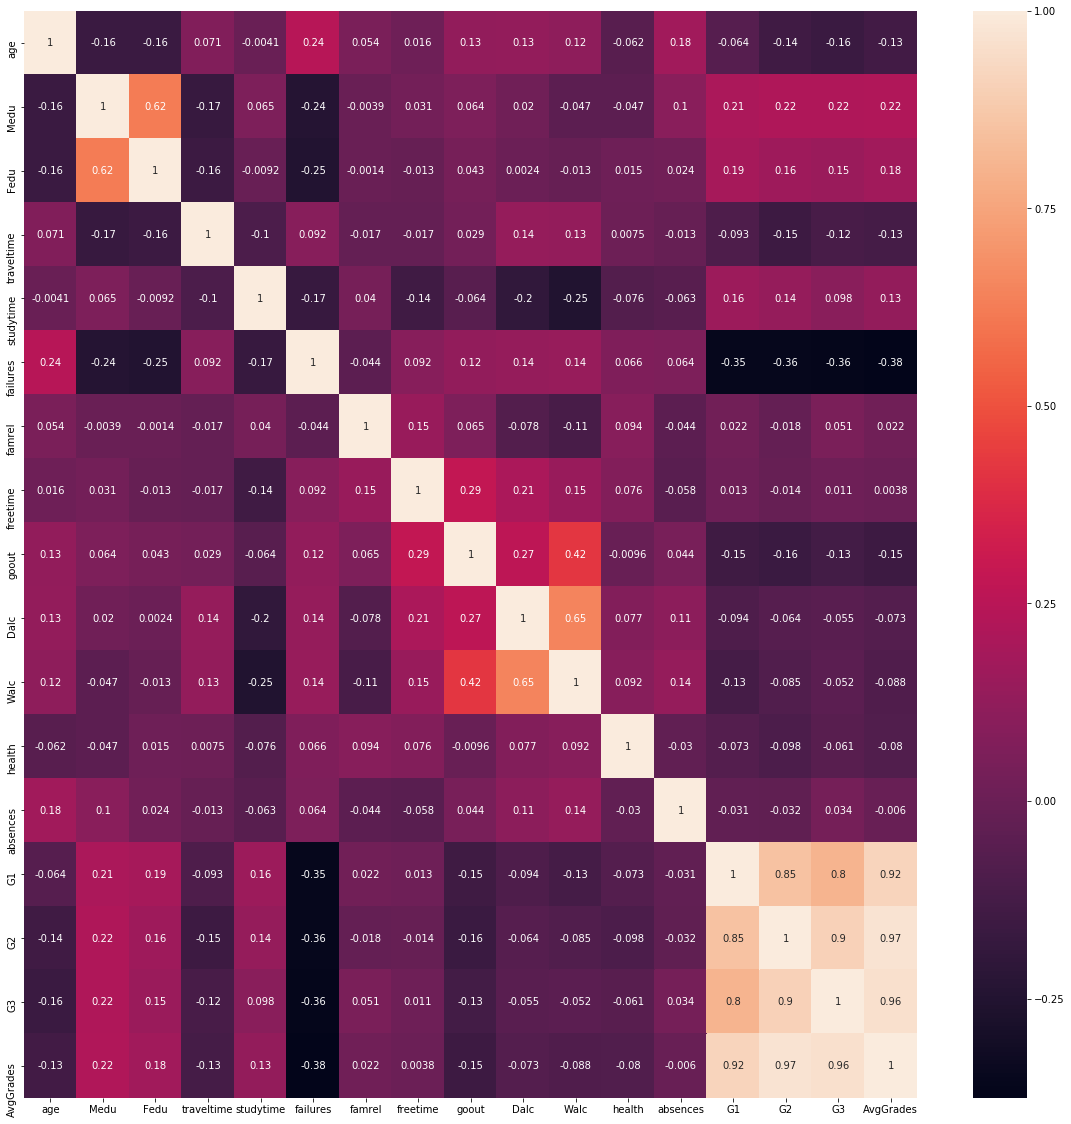

In [70]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,ax=ax)
plt.show()

In [73]:
df1["age"].nunique()

8

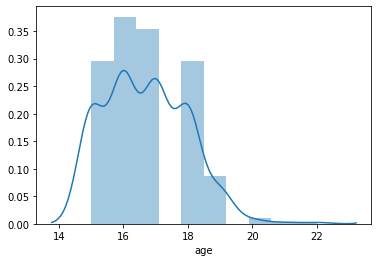

In [56]:
sns.distplot(df1.age, bins = 10)

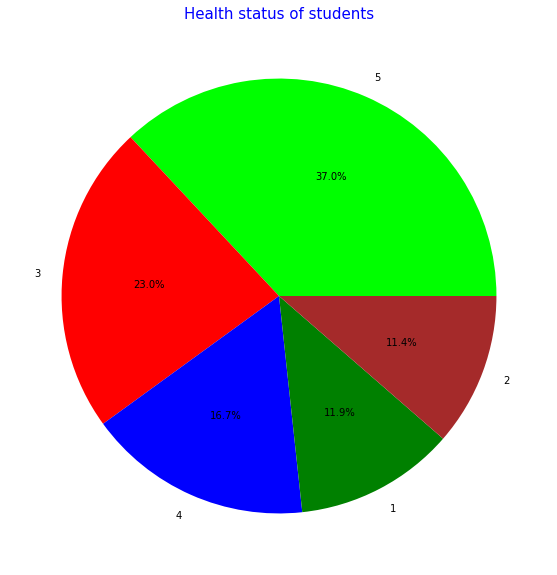

In [68]:
labels = df1.health.value_counts().index 
colors = ['lime','red','blue','green','brown']
explode = [0,0,0,0,0]
values = df1.health.value_counts().values 


plt.figure(figsize=(10,10))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("Health status of students",color="blue",fontsize=15)
plt.show()

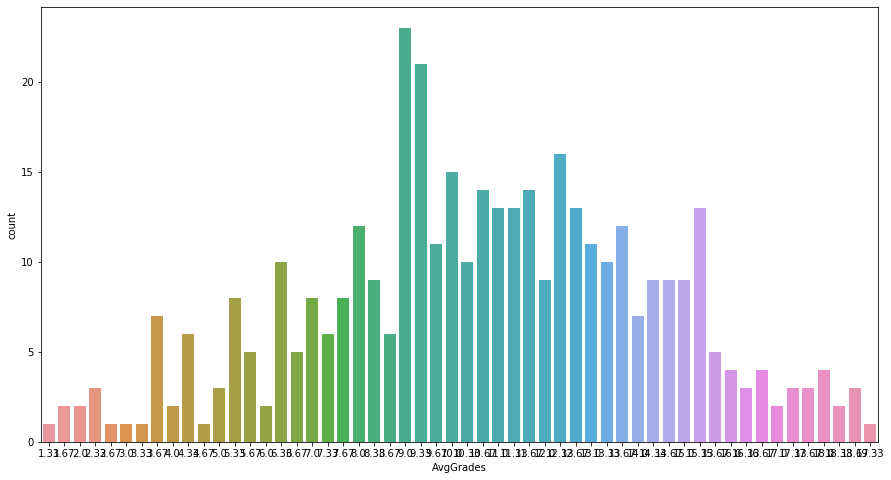

In [42]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.countplot(x="AvgGrades", data=df1)

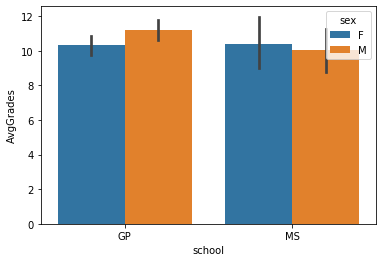

In [44]:
sns.barplot(x="school",y="AvgGrades",hue="sex",data=df1)

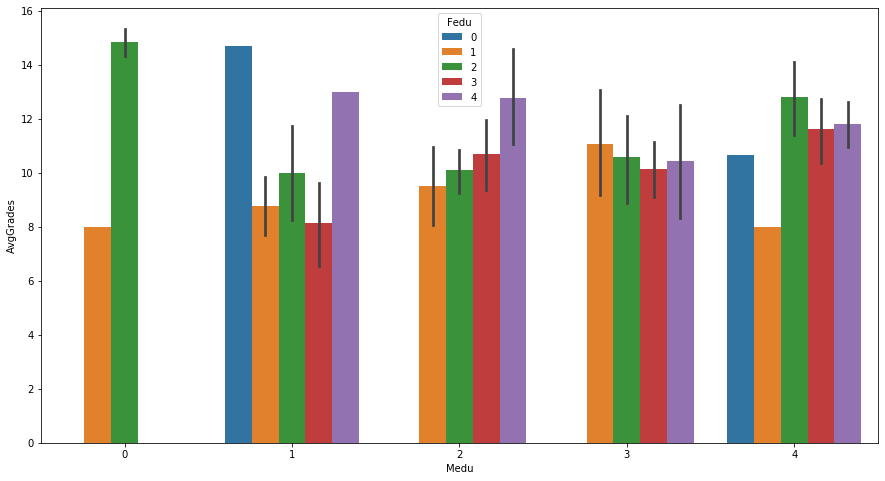

In [45]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.barplot(x="Medu",y="AvgGrades",hue="Fedu",data=df1)

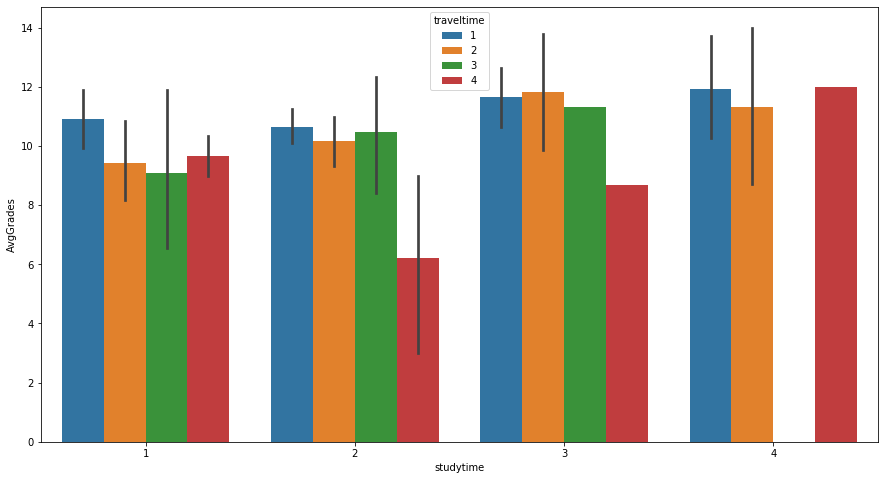

In [52]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.barplot(x="studytime",y="AvgGrades", hue="traveltime", data=df1)

In [57]:
def get_percentage_count(feature, data):
    counts = data.groupby(feature).school.count()
    counts = counts / data.shape[0] * 100
    return counts

Text(0.5, 1.0, 'Educational support in family')

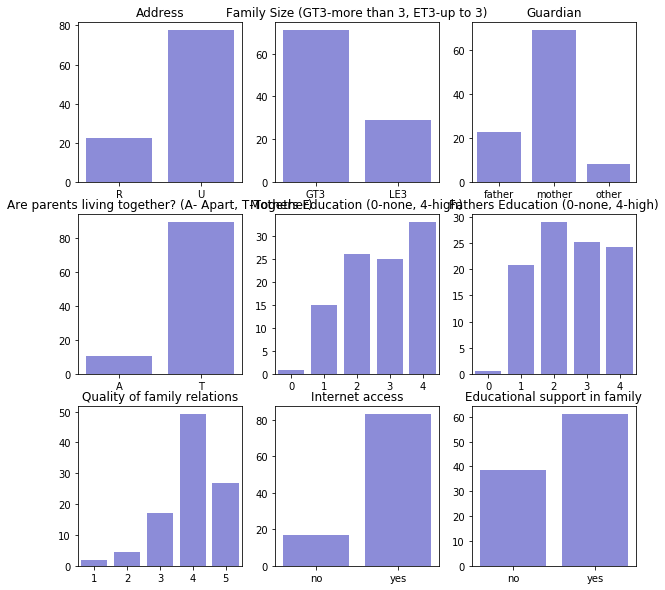

In [74]:
fig, ax = plt.subplots(3,3, figsize = (10,10))

sns.barplot(x = get_percentage_count("address", df1).index.values, y = get_percentage_count("address", df1).values, ax = ax[0,0], color = "mediumblue", alpha = 0.5)
ax[0,0].set_title("Address")

sns.barplot(x = get_percentage_count("famsize", df1).index.values, y = get_percentage_count("famsize", df1).values, ax = ax[0,1], color = "mediumblue", alpha = 0.5)
ax[0,1].set_title("Family Size (GT3-more than 3, ET3-up to 3)")

sns.barplot(x = get_percentage_count("guardian", df1).index.values, y = get_percentage_count("guardian", df1).values, ax = ax[0,2], color = "mediumblue", alpha = 0.5)
ax[0,2].set_title("Guardian")

sns.barplot(x = get_percentage_count("Pstatus", df1).index.values, y = get_percentage_count("Pstatus", df1).values, ax = ax[1,0], color = "mediumblue", alpha = 0.5)
ax[1,0].set_title("Are parents living together? (A- Apart, T-Together)")

sns.barplot(x = get_percentage_count("Medu", df1).index.values, y = get_percentage_count("Medu", df1).values, ax = ax[1,1], color = "mediumblue", alpha = 0.5)
ax[1,1].set_title("Mothers Education (0-none, 4-high)")

sns.barplot(x = get_percentage_count("Fedu", df1).index.values, y = get_percentage_count("Fedu", df1).values, ax = ax[1,2], color = "mediumblue", alpha = 0.5)
ax[1,2].set_title("Fathers Education (0-none, 4-high)")

sns.barplot(x = get_percentage_count("famrel", df1).index.values, y = get_percentage_count("famrel", df1).values, ax = ax[2,0], color = "mediumblue", alpha = 0.5)
ax[2,0].set_title("Quality of family relations")

sns.barplot(x = get_percentage_count("internet", df1).index.values, y = get_percentage_count("internet", df1).values, ax = ax[2,1], color = "mediumblue", alpha = 0.5)
ax[2,1].set_title("Internet access")

sns.barplot(x = get_percentage_count("famsup", df1).index.values, y = get_percentage_count("famsup", df1).values, ax = ax[2,2], color = "mediumblue", alpha = 0.5)
ax[2,2].set_title("Educational support in family")

Text(0.5, 1.0, 'Alcohol consumption on weekdends')

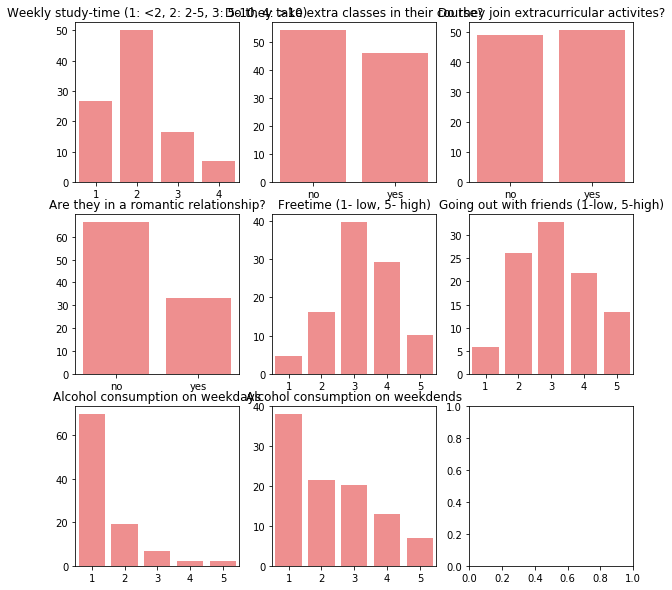

In [76]:
fig, ax = plt.subplots(3,3, figsize = (10,10))

sns.barplot(x = get_percentage_count("studytime", df1).index.values, y = get_percentage_count("studytime", df1).values, ax = ax[0,0], color = "red", alpha = 0.5)
ax[0,0].set_title("Weekly study-time (1: <2, 2: 2-5, 3: 5-10, 4: >10)")

sns.barplot(x = get_percentage_count("paid", df1).index.values, y = get_percentage_count("paid", df1).values, ax = ax[0,1], color = "red", alpha = 0.5)
ax[0,1].set_title("Do they take extra classes in their course?")

sns.barplot(x = get_percentage_count("activities", df1).index.values, y = get_percentage_count("activities", df1).values, ax = ax[0,2], color = "red", alpha = 0.5)
ax[0,2].set_title("Do they join extracurricular activites?")

sns.barplot(x = get_percentage_count("romantic", df1).index.values, y = get_percentage_count("romantic", df1).values, ax = ax[1,0], color = "red", alpha = 0.5)
ax[1,0].set_title("Are they in a romantic relationship?")

sns.barplot(x = get_percentage_count("freetime", df1).index.values, y = get_percentage_count("freetime", df1).values, ax = ax[1,1], color = "red", alpha = 0.5)
ax[1,1].set_title("Freetime (1- low, 5- high)")

sns.barplot(x = get_percentage_count("goout", df1).index.values, y = get_percentage_count("goout", df1).values, ax = ax[1,2], color = "red", alpha = 0.5)
ax[1,2].set_title("Going out with friends (1-low, 5-high)")

sns.barplot(x = get_percentage_count("Dalc", df1).index.values, y = get_percentage_count("Dalc", df1).values, ax = ax[2,0], color = "red", alpha = 0.5)
ax[2,0].set_title("Alcohol consumption on weekdays")

sns.barplot(x = get_percentage_count("Walc", df1).index.values, y = get_percentage_count("Walc", df1).values, ax = ax[2,1], color = "red", alpha = 0.5)
ax[2,1].set_title("Alcohol consumption on weekdends")